## Fit, Evaluate, Predict

<br>

- 데이터를 모델의 훈련 루프로 전달할 때는 **ndarray** 또는 **tf.data의 Dataset 객체**를 사용해야 함.
    - 물론 설정한 입력 차원수랑 동일해야...

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# 간단한 모델을 만들어보자.

# layer들을 먼저 생성한 후,
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='Dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='Dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

# 통합 model을 만든다.
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


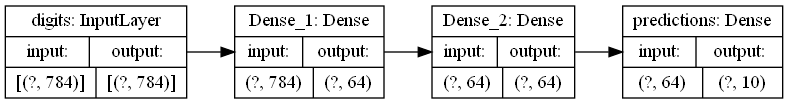

In [7]:
keras.utils.plot_model(model, show_shapes=True, rankdir='LR') # LR은 horizontal plot. 기본은 TB.

일반적인 workflow는 다음과 같다.  <br>

    학습
    --> 훈련 데이터에서 생성된 hold-out 데이터에 대한 validation check
    --> 테스트 데이터를 통한 평가

In [8]:
# MNIST 데이터를 불러오자.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
# 전처리 - 차원 변경, 자료형 변경 (uint8 --> float32)
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# 마지막 10000개의 데이터를 검증용 데이터로 사용.
# 이거 그냥 train_test_split 써서도 할 수 있지 않을까
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

**compile()**을 통해 훈련을 위한 모델 구성 정의.  <br>
- 최적화 방법, 손실함수, metrics
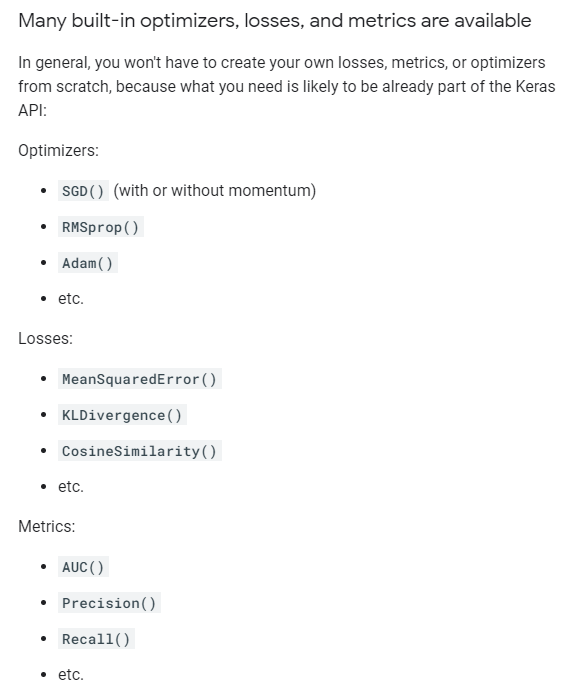

In [13]:
# 훈련을 위한 모델 구성 정의 (최적화 방법, 손실함수)
model.compile(
    optimizer = keras.optimizers.Adam(), #'adam' 같이 문자열로 줘도 됨.
    loss = keras.losses.SparseCategoricalCrossentropy(), # sparse_categorical_crossentropy 도 됨.
    metrics = [keras.metrics.SparseCategoricalAccuracy()] # 모니터링 할 metrics.
)

**fit()**을 호출하고 인자 설정  <br>
- **batch_size** 크기의 배치로 분할
- 지정된 **epochs**에 대해 전체 데이터를 반복처리, 훈련

In [14]:
print('<---Fit model on training data--->')
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=3,
    validation_data=(x_val, y_val) # 검증용 데이터를 통해 에포크 끝마다 loss를 확인한다.
    # 아니면 이전처럼 validation_split=0.2 이렇게 할 수도 있음.
)

<---Fit model on training data--->
Epoch 1/3
782/782 [==============================] - 1s 1ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.1725 - val_sparse_categorical_accuracy: 0.9480
Epoch 2/3
782/782 [==============================] - 1s 1ms/step - loss: 0.1510 - sparse_categorical_accuracy: 0.9555 - val_loss: 0.1354 - val_sparse_categorical_accuracy: 0.9605
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.1190 - val_sparse_categorical_accuracy: 0.9655s - loss: 0.1128 - sparse_categorical_accuracy: 0.96


fit()을 통해 반환된 객체에 .history를 이용해 **훈련 중 계산된 손실 값과 메트릭 값**을 확인할 수 있다.

In [15]:
history.history

{'loss': [0.3480176031589508, 0.15100830793380737, 0.11180564761161804],
 'sparse_categorical_accuracy': [0.8990799784660339,
  0.95551997423172,
  0.9674000144004822],
 'val_loss': [0.17248088121414185, 0.13542084395885468, 0.11896413564682007],
 'val_sparse_categorical_accuracy': [0.9480000138282776,
  0.9605000019073486,
  0.965499997138977]}

**evaluate()**를 이용해 테스트 데이터에 대한 모델을 평가할 수 있다.  <br>
마찬가지로 **predict()**를 통해 임시 데이터를 예측해볼 수 있다.

In [17]:
print('<---Evaluate on test data--->')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test accuracy : ', results, '\n')

print('<---Generate predictions for 3 samples--->')
predictions = model.predict(x_test[:3])
print('predictions shape : ', predictions.shape)

<---Evaluate on test data--->
79/79 [==============================] - 0s 1ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9652
test loss, test accuracy :  [0.12088821083307266, 0.9652000069618225] 

<---Generate predictions for 3 samples--->
predictions shape :  (3, 10)
